# An analysis of Vision Zero in Road Safety

## Introduction

In 1997, the Swedish Parliament decided that Vision Zero should be the basis for road safety work in Sweden. In the long term, no one should be killed or seriously injured in the road transport system. Despite significant progress in recent decades, challenges remain to be addressed in order to achieve this ambitious goal.

This analysis examines traffic data from 2003 to 2023, including trends in the number of road accidents, the contribution of different transport modes to accidents and serious injuries, and seasonal variations. The results aim to identify where interventions are needed to reduce accidents and improve road safety.

The data represents the year period 2003-2023 from Transportstyrelsen's side. 

Data has been collected from Transportstyrelsen and been analyzed to get an understanding for: 

- Number of deaths and serious injuries over the years.

- Which types of vehicles and accident types contribute most to the statistics.

- Seasonal variations and other patterns.

In this project, I aim to study whether Sweden is moving towards the Vision Zero in road safety. I will analyze traffic data to identify trends in fatalities and severe injuries over time. I will examine the most common causes of accidents, as well as which modes of transport and accident types contribute most to the statistics. The goal is to gain insights into where improvements are needed to further reduce fatalities and injuries on the roads.

Source: https://www.transportstyrelsen.se/sv/om-oss/statistik-och-analys/statistik-inom-vagtrafik/olycksstatistik/statistik-over-vagtrafikolyckor/

#### Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [2]:
file_path = "/Users/alvinalindqvist/Desktop/nationell_arstatistik.xlsx"
data = pd.ExcelFile(file_path)
print('Sheets in the excel:', data.sheet_names)

Sheets in the excel: ['Info', 'Omkomna', 'Skadade (P+S)', 'Skadade (RPMI)', 'Skadade gående (RPMI)']


## Fatalities in traffic

In [3]:
fatalities_data = pd.read_excel(file_path, sheet_name = "Omkomna", header = 8)

fatalities_data = fatalities_data.dropna(axis = 1, how = "all")
fatalities_data = fatalities_data.dropna(axis = 0, how = 'any')

fatalities_data['År'] = pd.to_numeric(fatalities_data['År'], errors='coerce').astype(int)

print('Number of fatalities')
fatalities_data.head()

Number of fatalities


,År,Jan,Feb,Mar,Apr,Maj,Jun,Jul,Aug,Sep,Okt,Nov,Dec,Summa total
0,2003,31,29,36,39,43,55,55,53,40,39,42,62,524.0
1,2004,25,29,26,36,37,64,45,57,39,47,29,46,480.0
2,2005,30,32,38,30,28,43,49,34,41,41,28,46,440.0
3,2006,21,28,26,38,33,50,50,49,39,28,35,48,445.0
4,2007,33,28,27,30,39,50,57,51,50,32,34,40,471.0


An overview of the data we can see that there are many people who have lost ther life in traffic. The highest yearly total is 524 fatalities in 2003, and the lowest is 204 in 2020, which may be because of reduced travel during the pandemic. Since 2016, the yearly fatalities have stayed around 200–270, indicating some progress in reducing fatalities compared to earlier years. However, in 2022 and 2023, fatalities increased again to 227 and 229, raising concerns about the recent trend.

### Data prep - Fatalities Categorized by Modes of Travel

In [4]:
fatalities_modesoftravel = pd.read_excel(file_path, sheet_name = "Omkomna", header = 84, nrows = 21)
fatalities_modesoftravel = fatalities_modesoftravel.dropna(axis = 1, how = 'all')
fatalities_modesoftravel.isnull().sum()

År                  0
Cykel               0
Gående              0
MC                  0
Moped               0
Övrigt              0
Personbil           0
Lastbil (lätt)      0
Lastbil (tung)      0
Lastbil (okänd)    11
Buss                5
Summa total         0
dtype: int64

We can see that the column "Lastbil (okänd)" (Truck unknown) has 11 missing values, which means that the majority of its rows are empty. The column "Buss" (Bus) has 5 missing values.

In [5]:
fatalities_modesoftravel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   År               21 non-null     int64  
 1   Cykel            21 non-null     int64  
 2   Gående           21 non-null     int64  
 3   MC               21 non-null     int64  
 4   Moped            21 non-null     int64  
 5   Övrigt           21 non-null     int64  
 6   Personbil        21 non-null     int64  
 7   Lastbil (lätt)   21 non-null     int64  
 8   Lastbil (tung)   21 non-null     int64  
 9   Lastbil (okänd)  10 non-null     float64
 10  Buss             16 non-null     float64
 11  Summa total      21 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 2.1 KB


Columns like "År" (Year), "Cykel" (Bicycle), "Gående" (Pedestrian), etc., have 21 non-empty values. The column "Lastbil (okänd)" (Truck - unknown) has only 10 non-empty values, meaning that the remaining 11 rows contain missing values. The column "Buss" (Bus) has 16 non-empty values, so 5 rows have missing values.

In [6]:
fatalities_modesoftravel = fatalities_modesoftravel.fillna(0)

fatalities_modesoftravel['År'] = pd.to_numeric(fatalities_modesoftravel['År'], errors='coerce').astype(int)

print('Fatalities Categorized by Modes of Travel')
fatalities_modesoftravel.head()

Fatalities Categorized by Modes of Travel


,År,Cykel,Gående,MC,Moped,Övrigt,Personbil,Lastbil (lätt),Lastbil (tung),Lastbil (okänd),Buss,Summa total
0,2003,33,55,46,9,5,344,13,6,3.0,10.0,524
1,2004,27,67,56,18,10,284,5,5,4.0,4.0,480
2,2005,38,50,46,8,7,271,11,6,2.0,1.0,440
3,2006,26,55,55,15,7,261,9,7,0.0,10.0,445
4,2007,33,58,60,14,6,276,9,6,3.0,6.0,471


### Data prep - Fatitities Categorized by Accident Type

In [7]:
fatalities_accident_type = pd.read_excel(file_path, sheet_name = "Omkomna", header = 109, nrows = 22)

fatalities_accident_type = fatalities_accident_type.dropna(axis = 1, how = 'all')
fatalities_accident_type = fatalities_accident_type.fillna(0)

print('Fatalities Categorized by Accident Type')
fatalities_accident_type.head(3)

Fatalities Categorized by Accident Type


,År,Av-svängande,Cykel-moped,Gående (påkörningsolyckor),Korsande kurs,Möte,Omkörning,Singel,Upp-hinnande,Vilt,Övrigt,Summa total
0,2003,20,25,54,72,112,5.0,163,14,6,53,524
1,2004,9,32,60,37,89,0.0,160,10,12,71,480
2,2005,15,29,51,22,100,5.0,158,9,8,43,440


For the data regarding fatalities based on modes of travel and accident types, I handled NaN values by replacing them with 0's. Upon examining the data in the Excel file, I observed that the NaN values represented empty entries. I assume these values indicate 0 (no fatalities), as there are no actual 0 values anywhere else in the dataset. However, if there had been 0's in other parts of the dataset, I would have investigated further to determine whether these NaN values might instead signify missing data for those specific years and categories.

### Plotting Fatalities Data

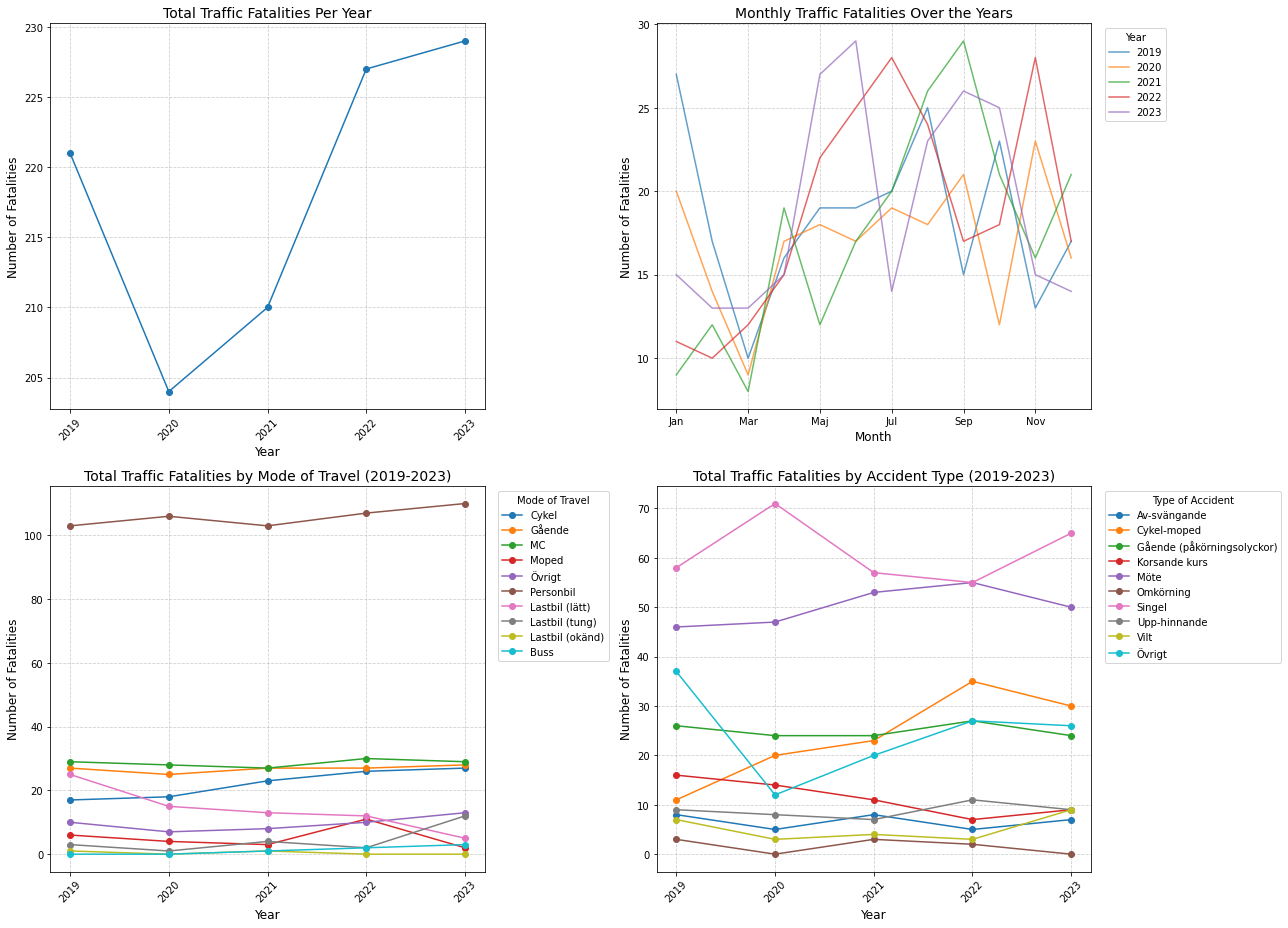

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(18, 13))  

# Första diagrammet
fatalities_data = fatalities_data[(fatalities_data['År'] >= 2019)]

years = fatalities_data['År']
totals = fatalities_data['Summa total']

ax[0,0].plot(years, totals, marker='o')

ax[0,0].set_xticks(years) 
ax[0,0].set_xticklabels(years, rotation=45) 
ax[0,0].set_title('Total Traffic Fatalities Per Year', fontsize=14)
ax[0,0].set_xlabel('Year', fontsize=12)
ax[0,0].set_ylabel('Number of Fatalities', fontsize=12)
ax[0,0].grid(True, linestyle='--', alpha=0.6)


# Andra diagrammet
monthly_data = fatalities_data.iloc[:, 1:13] 
monthly_data.columns = fatalities_data.columns[1:13]  
monthly_data.index = fatalities_data['År'] 

monthly_data.T.plot(ax=ax[0, 1], legend=True, alpha=0.7)
ax[0,1].set_title('Monthly Traffic Fatalities Over the Years', fontsize=14)
ax[0,1].set_xlabel('Month', fontsize=12)
ax[0,1].set_ylabel('Number of Fatalities', fontsize=12)
ax[0,1].grid(True, linestyle='--', alpha=0.6)
ax[0,1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10, title="Year")


# Tredje diagrammet
fatalities_modesoftravel = fatalities_modesoftravel[(fatalities_modesoftravel['År'] >= 2019)]
years1 = fatalities_modesoftravel['År']

for column in fatalities_modesoftravel.columns:
    if column != 'År' and column != 'Summa total':  
        ax[1, 0].plot(years1, fatalities_modesoftravel[column], marker='o', label=column)

ax[1,0].set_xticks(years1)
ax[1,0].set_xticklabels(years1, rotation=45)
ax[1,0].set_title('Total Traffic Fatalities by Mode of Travel (2019-2023)', fontsize=14)
ax[1,0].set_xlabel('Year', fontsize=12)
ax[1,0].set_ylabel('Number of Fatalities', fontsize=12)
ax[1,0].grid(True, linestyle='--', alpha=0.6)
ax[1,0].legend(title='Mode of Travel', fontsize=10, loc='upper left', bbox_to_anchor=(1.02, 1))

# Fjärde diagrammet
fatalities_accident_type = fatalities_accident_type[(fatalities_accident_type['År'] >= 2019)]
years2 = fatalities_accident_type['År']

for column in fatalities_accident_type.columns:
    if column != 'År' and column != 'Summa total':  
        ax[1, 1].plot(years2, fatalities_accident_type[column], marker='o', label=column)

ax[1,1].set_xticks(years2)
ax[1,1].set_xticklabels(years2, rotation=45)
ax[1,1].set_title('Total Traffic Fatalities by Accident Type (2019-2023)', fontsize=14)
ax[1,1].set_xlabel('Year', fontsize=12)
ax[1,1].set_ylabel('Number of Fatalities', fontsize=12)
ax[1,1].grid(True, linestyle='--', alpha=0.6)
ax[1,1].legend(title='Type of Accident', fontsize=10, loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

#### Total Traffic Fatalities Per Year
Fatalities decreased significantly in 2020, likely due to the pandemic and reduced traffic activity. This shows how societal changes can quickly impact road safety. However, numbers have increased steadily since then, with 2022 and 2023 showing concerning trends.

#### Monthly Traffic Fatalities Over the Years
Summer months like June and July clearly see higher fatalities, likely due to increased travel during vacation periods. At the same time, March stands out as one of the safer months – it would be interesting to investigate if this is due to reduced travel or favorable weather conditions.

#### Total Traffic Fatalities by Mode of Travel
It is striking that cars account for the majority of fatalities, which is unsurprising given their dominance on the roads. It is alarming that motorcycle fatalities remain high, especially considering they are mostly used during the summer months. Also fatalities involving bicycles appear to be on the rise. Light trucks accidents seems to fall, so that is possitive. 

#### Total Traffic Fatalities by Accident Type
Single accidents and head-on collisions are the most common causes of fatalities. However, head-on collisions has a negative trend in 2023 but single accidents seems to increse. Cycle-moped and Other is also an accident type that seems to have an increasing trend over the years, but luckily has a negative trend in 2023.  

## Plotting Fatalities Data, 2023

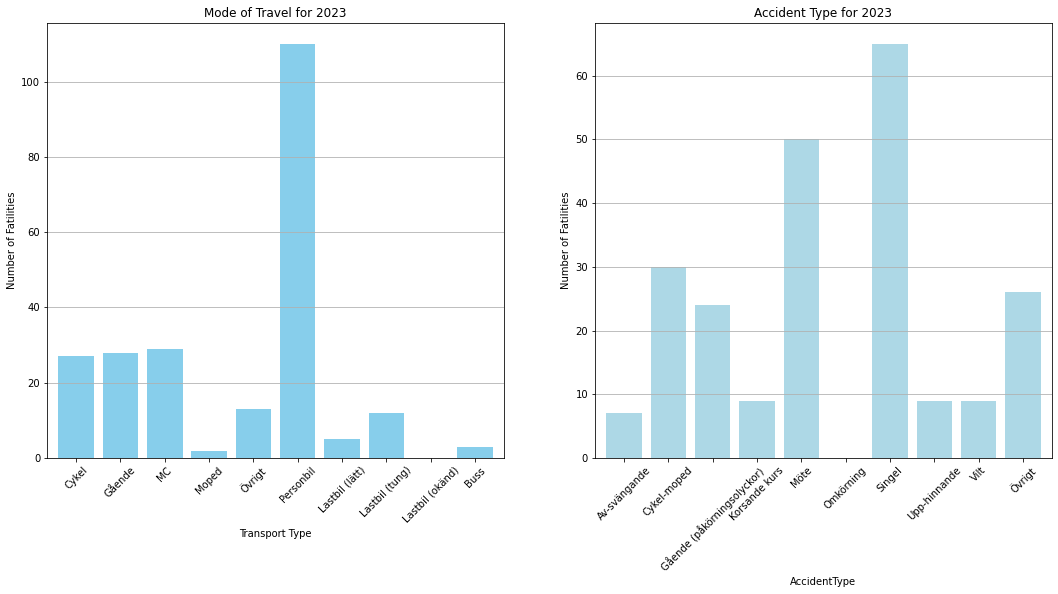

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))

# Fig 1
fatalities_modesoftravel_23 = fatalities_modesoftravel[fatalities_modesoftravel['År'] == 2023]

data_2023 = fatalities_modesoftravel_23.drop(columns=['År', 'Summa total'])

data_2023.T.plot(kind='bar', ax=ax[0], legend=False, width=0.8, color = 'Skyblue')  

ax[0].set_xticklabels(data_2023.columns, rotation=45) 


ax[0].set_title("Mode of Travel for 2023")
ax[0].set_xlabel("Transport Type")
ax[0].set_ylabel("Number of Fatilities")
ax[0].grid(axis='y')

#Fig 2
fatalities_accident_type23 = fatalities_accident_type[fatalities_accident_type['År'] == 2023]

data_2023 = fatalities_accident_type23.drop(columns=['År', 'Summa total'])

# Plotta histogram i den första subplott-axeln
data_2023.T.plot(kind='bar', ax=ax[1], legend=False, width=0.8, color = 'Lightblue') 

ax[1].set_xticklabels(data_2023.columns, rotation=45) 
ax[1].set_title("Accident Type for 2023")
ax[1].set_xlabel("AccidentType")
ax[1].set_ylabel("Number of Fatilities")
ax[1].grid(axis='y')

plt.show()

The plot from 2023 shows that car accidents account for the majority of fatalities. This is not surprising, as cars are in use throughout the day and year. Pedestrians, motorcyclists and cyclists also contribute significantly to the fatality numbers, reflecting their vulnerability in traffic.

Regarding accident types, single accidents are the most common, followed by head-on collisions. To reduce fatalities, we could focus on better road design, teaching drivers to be safer and making sure traffic rules are followed more strictly. It would also be interesting to investigate why single-vehicle accidents are at such a high level—factors like alcohol consumption, road conditions, or visibility issues could play a role.

While cars dominate the fatality statistics, accidents involving buses are significantly lower, this could be a potential benefit of public transportation. Promoting public transport could be a long-term strategy to reduce overall traffic accidents and fatalities.

## Severely injured

When examining the severely injured, I will select the sheet 'Skadade (RPMI)' instead of "Skadade (P+S)" because it is more closely related to the vision zero concept. The injury numbers are not whole numbers because they are averages calculated using RPMI1%. This makes the data easier to compare across years and categories but does not reflect exact counts of injured people.

In [10]:
Severe_injured = pd.read_excel(file_path, sheet_name='Skadade (RPMI)', header=7, nrows=8).iloc[:, :14]
Severe_injured.fillna(0, inplace=True)  

very_Severe_injured = pd.read_excel(file_path, sheet_name="Skadade (RPMI)", header=7, nrows=8).iloc[:, 15:]
very_Severe_injured.columns = [col.replace('.1', '') for col in very_Severe_injured.columns]
very_Severe_injured.fillna(0, inplace=True)

if 'index' in Severe_injured.columns:
    Severe_injured.drop(columns=['index'], inplace=True)
if 'index' in very_Severe_injured.columns:
    very_Severe_injured.drop(columns=['index'], inplace=True)

Severe_injured.set_index("År", inplace=True)
very_Severe_injured.set_index("År", inplace=True)

total_injured = Severe_injured.add(very_Severe_injured, fill_value=0)

total_injured["Summa total"] = total_injured.iloc[:, :12].sum(axis=1)

total_injured.reset_index(inplace=True)

columns_order = ["År"] + list(Severe_injured.columns) 
total_injured = total_injured[columns_order]

total_injured

,År,Jan,Feb,Mar,Apr,Maj,Jun,Jul,Aug,Sep,Okt,Nov,Dec,Summa total
0,2016,280.070996,258.434230,243.090509,322.461796,537.661806,509.769130,474.463875,483.662666,471.730603,388.719236,336.200039,285.921332,4592.186219
1,2017,302.464690,232.206605,289.115723,291.609141,457.820830,467.427598,448.833534,480.412283,389.028083,398.631107,418.615169,304.644701,4480.809463
2,2018,284.870577,209.537856,201.683213,306.815017,514.480367,467.339039,404.142177,389.922469,358.440359,361.970113,289.135763,251.142324,4039.479272
3,2019,262.879708,188.848542,213.901726,306.898500,381.292386,451.944360,390.951424,469.482319,367.217556,356.343730,287.597266,245.962670,3923.320187
4,2020,221.605605,226.426501,186.500675,245.374453,320.681707,459.576129,348.950650,420.050868,352.747523,280.978193,236.700151,170.265133,3469.857588
5,2021,205.799644,151.229909,175.654799,227.552460,290.880163,447.646706,664.265634,512.549546,458.992373,467.242455,390.363906,311.442368,4303.619964
6,2022,289.447000,302.959000,332.157670,387.619001,542.507084,648.845462,635.146240,614.698003,507.243181,473.608136,382.147308,305.286707,5421.664792
7,2023,313.896883,245.608820,308.616447,367.402267,562.420357,691.981862,537.907598,533.825044,577.249220,405.163884,348.795760,242.396143,5135.264285


In [11]:
Severe_injured_modeoftravel = pd.read_excel(file_path, sheet_name = 'Skadade (RPMI)', header = 49, nrows = 8).iloc[:,:12]
Very_Severe_injured_modeoftravel = pd.read_excel(file_path, sheet_name = 'Skadade (RPMI)', header = 49, nrows = 8).iloc[:,15:27]

In [12]:
Very_Severe_injured_modeoftravel.columns = [col.replace(".1", "") for col in Very_Severe_injured_modeoftravel.columns]

if 'index' in Severe_injured_modeoftravel.columns:
    Severe_injured_modeoftravel.drop(columns=['index'], inplace=True)
    
if 'index' in Very_Severe_injured_modeoftravel.columns:
    Very_Severe_injured_modeoftravel.drop(columns=['index'], inplace=True)

Severe_injured_modeoftravel.set_index("År", inplace=True)
Very_Severe_injured_modeoftravel.set_index("År", inplace=True)

total_injured_modeoftravel = Severe_injured_modeoftravel.add(Very_Severe_injured_modeoftravel, fill_value=0)
total_injured_modeoftravel

,Buss,Cykel,Gående,Lastbil (lätt),Lastbil (okänd),Lastbil (tung),MC,Moped,Personbil,Övrigt,Summa total
År,,,,,,,,,,,
2016,67.633647,2084.106369,230.458068,32.314719,6.061577,20.952074,269.346645,245.815643,1548.547712,86.949765,4592.186219
2017,75.172767,2103.966625,213.801222,29.007337,8.063079,21.518557,238.514208,227.672713,1468.701736,94.391219,4480.809463
2018,68.006540,1977.225884,199.266484,24.583694,10.967819,18.343119,211.039597,221.953084,1241.208970,66.884081,4039.479272
2019,79.152114,1949.809051,192.226757,22.748623,8.303510,12.362567,192.881031,227.770242,1072.375046,165.691246,3923.320187
2020,41.468231,1930.681661,142.503617,15.090011,2.742523,11.658384,207.622503,206.436281,805.506199,106.148177,3469.857588
2021,45.888449,2363.121408,198.693690,21.852761,4.987820,23.983724,240.157174,242.433644,1072.859796,89.641498,4303.619964
2022,51.418204,3118.983040,304.693209,23.075371,6.393111,19.979666,306.983534,283.672365,1195.689239,110.777054,5421.664792
2023,71.452955,2847.976931,289.702190,21.563760,6.063687,20.449861,307.246313,246.889829,1203.685354,120.233406,5135.264285


In [13]:
Severe_injured_accident_type = pd.read_excel(file_path, sheet_name = 'Skadade (RPMI)', header = 63, nrows = 8).iloc[:,:12]
Very_Severe_injured_accident_type = pd.read_excel(file_path, sheet_name = 'Skadade (RPMI)', header = 63, nrows = 8).iloc[:,15:27]

In [14]:
Very_Severe_injured_accident_type.columns = [col.replace(".1", "") for col in Very_Severe_injured_accident_type.columns]

if 'index' in Severe_injured_accident_type.columns:
    Severe_injured_accident_type.drop(columns=['index'], inplace=True)
    
if 'index' in Very_Severe_injured_accident_type.columns:
    Very_Severe_injured_accident_type.drop(columns=['index'], inplace=True)

Severe_injured_accident_type.set_index("År", inplace=True)
Very_Severe_injured_accident_type.set_index("År", inplace=True)

total_injured_accident_type = Severe_injured_accident_type.add(Very_Severe_injured_accident_type, fill_value=0)
total_injured_accident_type

,Av-svängande,Cykel-moped,Gående (påkörningsolyckor),Korsande kurs,Möte,Omkörning,Singel,Upp-hinnande,Vilt,Övrigt,Summa total
År,,,,,,,,,,,
2016,111.386141,2286.451239,233.680008,170.655064,142.259137,43.230269,741.414338,585.760478,76.990552,200.358991,4592.186219
2017,96.318221,2289.171873,216.378661,149.351299,137.849685,42.980866,681.864460,572.559148,74.825490,219.509758,4480.809463
2018,94.687734,2172.497657,196.636296,138.707011,138.405545,40.203443,537.006064,471.003165,70.309075,180.023281,4039.479272
2019,77.986423,2143.723271,197.647143,119.750470,115.145439,31.934718,445.697590,451.248495,68.973694,271.212945,3923.320187
2020,66.852547,2096.516721,145.391743,98.396555,64.783812,23.941272,440.296763,289.801199,50.305498,193.571479,3469.857588
2021,78.085344,2537.808226,155.333276,113.358714,110.064961,27.378685,569.516118,364.616856,66.293751,281.164032,4303.619964
2022,90.560077,3323.994331,221.632033,115.995299,125.873175,26.810474,705.630322,380.692200,59.463370,371.013514,5421.664792
2023,86.839286,3022.304630,213.807009,118.503450,168.974227,22.310866,677.449834,387.976672,70.139447,366.958864,5135.264285


## Plotting (Very) Severely Injured Data

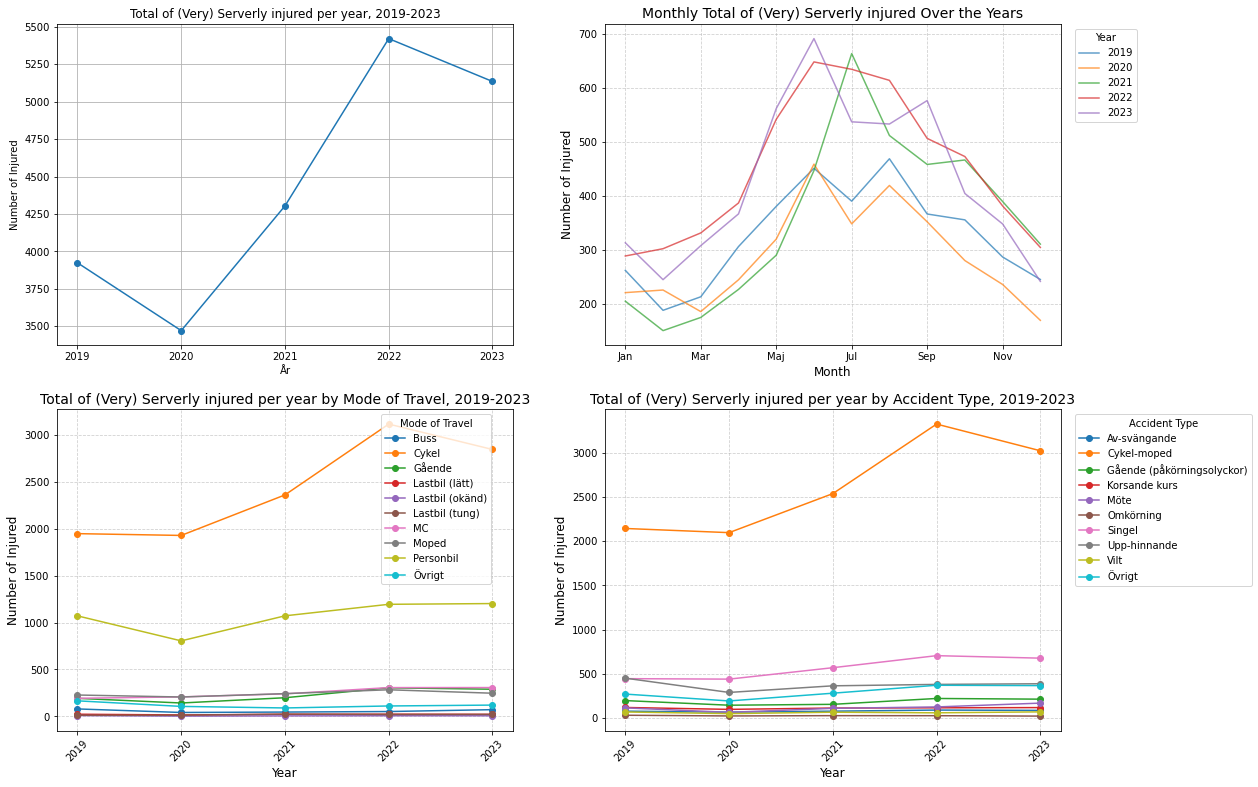

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(18, 13)) 

# Fig 1
total_injured = total_injured[total_injured['År'].astype(int) >= 2019]

years3 = total_injured['År']
totals3 = total_injured['Summa total']

ax[0,0].set_xticks(years3)  # Sätt hela år som tick-värden
ax[0,0].plot(years3, totals3, marker='o')
ax[0,0].set_xlabel('År')
ax[0,0].set_ylabel('Number of Injured')
ax[0,0].set_title('Total of (Very) Serverly injured per year, 2019-2023')
ax[0,0].grid(True)

# Fig 2
monthly_data1 = total_injured.iloc[:, 1:13]  
monthly_data1.columns = total_injured.columns[1:13]  
monthly_data1.index = total_injured['År']  

monthly_data1.T.plot(ax=ax[0, 1], legend=True, alpha=0.7)
ax[0,1].set_title('Monthly Total of (Very) Serverly injured Over the Years', fontsize=14)
ax[0,1].set_xlabel('Month', fontsize=12)
ax[0,1].set_ylabel('Number of Injured', fontsize=12)
ax[0,1].grid(True, linestyle='--', alpha=0.6)
ax[0,1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10, title="Year")

#Fig 3
total_injured_modeoftravel = total_injured_modeoftravel.reset_index()
total_injured_modeoftravel = total_injured_modeoftravel[(total_injured_modeoftravel['År'] >= 2019)]
years4 = total_injured_modeoftravel['År']

for column in total_injured_modeoftravel.columns:
    if column != 'År' and column != 'Summa total':  # ta bort "År" och "Summa total"
        ax[1, 0].plot(years4, total_injured_modeoftravel[column], marker='o', label=column)

ax[1,0].set_xticks(years4)
ax[1,0].set_xticklabels(years4, rotation=45)
ax[1,0].set_title('Total of (Very) Serverly injured per year by Mode of Travel, 2019-2023', fontsize=14)
ax[1,0].set_xlabel('Year', fontsize=12)
ax[1,0].set_ylabel('Number of Injured', fontsize=12)
ax[1,0].grid(True, linestyle='--', alpha=0.6)
ax[1,0].legend(title='Mode of Travel', fontsize=10, loc='upper left', bbox_to_anchor=(0.7, 1))

#Fig 4
total_injured_accident_type = total_injured_accident_type.reset_index()
total_injured_accident_type = total_injured_accident_type[(total_injured_accident_type['År'] >= 2019)]
years5 = total_injured_accident_type['År']

for column in total_injured_accident_type.columns:
    if column != 'År' and column != 'Summa total':  # ta bort "År" och "Summa total"
        ax[1, 1].plot(years5, total_injured_accident_type[column], marker='o', label=column)

ax[1,1].set_xticks(years5)
ax[1,1].set_xticklabels(years5, rotation=45)
ax[1,1].set_title('Total of (Very) Serverly injured per year by Accident Type, 2019-2023', fontsize=14)
ax[1,1].set_xlabel('Year', fontsize=12)
ax[1,1].set_ylabel('Number of Injured', fontsize=12)
ax[1,1].grid(True, linestyle='--', alpha=0.6)
ax[1,1].legend(title='Accident Type', fontsize=10, loc='upper left', bbox_to_anchor=(1.02, 1))

plt.show()

#### Total of (Very) Severely Injured per Year (2019–2023)
The first plot highlights a concerning trend. There is though a noticeable dip in 2020, likely due the pandemic, but the numbers have risen significantly in the following years. Especially 2022 was a dark year. Despite a slight improvement in 2023, the overall trend is moving in the wrong direction.

#### Monthly Total of (Very) Severely Injured Over the Years
The second plot shows a seasonal pattern in the injuries, with peaks during the summer months. Increased outdoor activities and travel during these months may contribute to higher injury rates. January also shows higher numbers, which may be attributed to the weather conditions or post-holiday traffic. 

#### Total of (Very) Severely Injured per Year by Mode of Travel (2019–2023)
The third plot shows that car users account for the majority of severe injuries, which aligns with their dominance on the roads. However, pedestrians and cyclists also represent a substantial proportion. unfortantly the numbers for cyclists appear to be increasing.

#### Total of (Very) Severely Injured per Year by Accident Type (2019–2023)
The fourth plot shows that cycles-moped accidents are the most common cause of severe injuries. It is interesting to note that single accidents and head-on collisions have a very high fatality rate, yet the injury level is relatively low. In contrast, cycle-moped accidents result in a very high number of injuries butfewer fatalities. This may suggest that single accidents and head-on accidents are often more severe, with fewer people surviving them, while cycle-moped accidents, despite causing many injuries, may be less fatal.

## Combine Fatilities and Total injured

I will be using merge() to combine data. 

In [16]:
fatalities_total = fatalities_data[['År', 'Summa total']].rename(columns={'Summa total': 'Number of Fatilities'})
injuries_total = total_injured[['År', 'Summa total']].rename(columns={'Summa total': 'Number of Serverly injured'})

combined_totals = pd.merge(fatalities_total, injuries_total,on='År',how='inner')

combined_totals

,År,Number of Fatilities,Number of Serverly injured
0,2019,221.0,3923.320187
1,2020,204.0,3469.857588
2,2021,210.0,4303.619964
3,2022,227.0,5421.664792
4,2023,229.0,5135.264285


In [17]:
combined_totals['Fatalities Change (%)'] = combined_totals['Number of Fatilities'].pct_change() * 100
combined_totals['Injured Change (%)'] = combined_totals['Number of Serverly injured'].pct_change() * 100
combined_totals

,År,Number of Fatilities,Number of Serverly injured,Fatalities Change (%),Injured Change (%)
0,2019,221.0,3923.320187,NaN,NaN
1,2020,204.0,3469.857588,-7.692308,-11.558134
2,2021,210.0,4303.619964,2.941176,24.028720
3,2022,227.0,5421.664792,8.095238,25.979172
4,2023,229.0,5135.264285,0.881057,-5.282520


## Summary

While the long-term trend shows improvement, with fatalities decreasing from 300–500 per years ago to just over 200 in recent years, the short-term trend is worrying. Fatalities and severe injuries have risen steadily since 2020, and 2022 being particularly concerning. Although there was a bit improvement in 2023, the numbers remain high and far from the Vision Zero goal.

Cyclists and pedestrians are increasingly vulnerable, while single-vehicle and head-on collisions remain the deadliest accident types. Seasonal patterns were clear, with injuries peaking in summer months, likely due to increased travel and outdoor activities. Interestingly, January also showed relatively high numbers, potentially linked to post-holiday traffic and winter conditions.

When examining transportation modes, car users accounted for the majority of fatalities and injuries, reflecting their activness on the roads. Cyclists and pedestrians also represented a significant share, and the increasing injuries among cyclists are concerning. Meanwhile, accident types revealed that single accidents and head-on collisions are the deadliest, with high fatality rates but lower injury numbers. In contrast, cycle-moped accidents result in many injuries but fewer fatalities, suggesting differences in severity and survivability.

To reverse the recent negative trend and make further progress, targeted actions such as improving road safety for vulnerable groups, addressing the causes of single accidents, and strengthening enforcement of traffic regulations are crucial. Achieving Vision Zero will require consistent and innovative efforts to make traffic safer for all road users.

Recommendations could be
- Improve infrastructure with safer crossings and separate bike lanes.
- Educate motorists and vulnerable road users on safety.
- Use technology like automatic braking systems.
- Focus on seasonal safety measures for summer and winter.
- Enforce stricter regulations, like speed limits and seat belt use.

Targeted actions aligned with Vision Zero can make traffic safer for all.